In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

import matplotlib.pyplot as plt
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# from keras.datasets import mnist
# mnist_data = mnist.load_data()
file = np.load('../../Assets/mnist.npz')
x_train, y_train = file['x_train'], file['y_train']
x_test, y_test = file['x_test'], file['y_test']
file.close()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

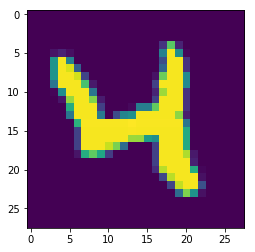

In [5]:
plt.figure()
plt.imshow(x_train[20])

In [6]:
x_train = x_train.reshape((60000,784))
x_test = x_test.reshape((10000,784))

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [7]:
print(x_train[0].shape)
print(x_test[0].shape)

(784,)
(784,)


In [8]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)
y_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
model = Sequential()
model.add(Dense(100,activation='sigmoid', input_dim=784))
model.add(Dense(100,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [11]:
import time
t = time.time()
model.fit(x_train, y_train, batch_size=100, epochs=20, verbose=1, validation_data=(x_test, y_test))
print('Caculation duration : %0.3f' % (time.time()-t) )

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 25us/step - loss: 2.2839 - acc: 0.1759 - val_loss: 2.2515 - val_acc: 0.3238
Epoch 2/20
60000/60000 [==============================] - 1s 18us/step - loss: 2.2221 - acc: 0.3271 - val_loss: 2.1863 - val_acc: 0.4389
Epoch 3/20
60000/60000 [==============================] - 1s 18us/step - loss: 2.1436 - acc: 0.4557 - val_loss: 2.0873 - val_acc: 0.5327
Epoch 4/20
60000/60000 [==============================] - 1s 18us/step - loss: 2.0216 - acc: 0.5284 - val_loss: 1.9351 - val_acc: 0.5544
Epoch 5/20
60000/60000 [==============================] - 1s 18us/step - loss: 1.8447 - acc: 0.5870 - val_loss: 1.7294 - val_acc: 0.6192
Epoch 6/20
60000/60000 [==============================] - 1s 18us/step - loss: 1.6267 - acc: 0.6415 - val_loss: 1.4986 - val_acc: 0.6899
Epoch 7/20
60000/60000 [==============================] - 1s 18us/step - loss: 1.4022 - acc: 0.7007 - val_loss: 1.2822 - val_acc

In [12]:
score = model.evaluate(x_test, y_test)
print(score)

10000/10000 [==============================] - 0s 20us/step
[0.4536156064748764, 0.8831]


In [13]:
y_pred = model.predict(x_test)
y_pred.shape

(10000, 10)

In [14]:
y_pred[0]

array([6.5694971e-04, 1.6626582e-04, 3.0886044e-04, 3.4373479e-03,
       2.5001619e-04, 1.4754271e-03, 3.5217372e-06, 9.7478175e-01,
       2.5084996e-04, 1.8668894e-02], dtype=float32)

<BarContainer object of 10 artists>

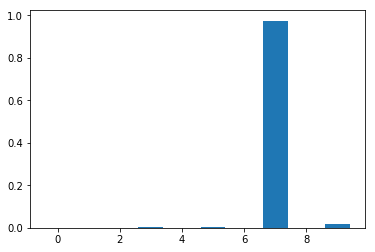

In [15]:
plt.bar(range(10),y_pred[0])

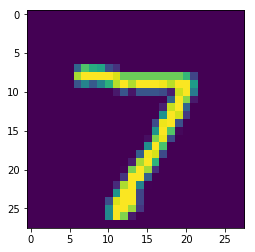

In [16]:
plt.imshow(x_test[0].reshape((28,28)))